# Линейная алгебра. Лабораторная работа 1, осень 2024



В этой лабораторной работе вы познакомитесь со средой Jupyter Notebook и библиотеками numpy и scipy.

## Часть 1. Библиотеки

В этой лабораторной работе вам понадобятся три библиотеки:

- `numpy` – основная библиотека для работы с матрицами;
- `scipy`, а точнее модуль `scipy.linalg`, содержащий множество функций линейной алгебры;
- `matplotlib` – графическая библиотека

Подключить их можно следующим образом:

In [203]:
# Запустите этот код
import numpy as np

import scipy.linalg as sla

import matplotlib.pyplot as plt
%matplotlib inline

Теперь вы можете позвать, скажем, функцию `scipy.linalg.det()` с помощью кода `sla.det()`, а функцию `numpy.exp()` – с помощью кода `np.exp()`.

**Основные объекты и операции линейной алгебры в NumPy и SciPy:**

Основной объект, с которым вам придётся работать и в этой, и в следующих лабораторных, – это, безусловно, матрицы. В библиотеке `numpy` они представлены классом `numpy.ndarray`. Матрицу можно создать из двумерного (а на самом деле и не только двумерного) массива следующим образом:

In [204]:
# Запустите этот код
A = np.array([[1, 2, 3], [4, 5, 6]])

print(A)
print(A.shape) # пара (число строк, число столбцов)

[[1 2 3]
 [4 5 6]]
(2, 3)


Обратите внимание, что матрица заполняется *по строкам*.

Есть и много других конструкторов матриц. Например, единичная матрица размера $n\times n$ создаётся с помощью функции `numpy.eye(n)`. Со всем многообразием конструкторов можно ознакомиться [на этой странице](https://docs.scipy.org/doc/numpy-1.10.1/reference/routines.array-creation.html).

Зачастую бывает нужно получить доступ к подматрицам данной матрицы, и numpy предоставляет множество удобных средств, как это сделать (вообще данная процедура называется slicing):
- элемент с номером `(i,j)`: `A[i,j]`
- i-я строка матрицы: `A[i,:]`
- j-й столбец матрицы: `A[:,j]`

**Внимание!** Оба варианта, и `A[i,:]`, и `A[:,j]` дают не строку или столбец, а одномерный вектор. Если вы хотите получить вектор-строку или вектор-столбец соответственно, используйте вот такой синтаксис: `A[i:i+1,:]` и `A[:,j:j+1]`
- строки с нулевой по i-ю: `A[:i+1,:]`
- столбцы с j-го по последний: `A[:,j:]`
- строки с i-й по k-ю: `A[i:k,:]`

В некоторых случаях нужно получить доступ к (прямоугольной) подматрице, элементы которой находятся на пересечении строк из списка `rows` и столбцов из списка `columns`. В этом случае `A[rows, columns]` даст не то, что вы ожидаете (можете попробовать это сделать сами и увидеть, что получится; только возьмите `rows` и `columns` одного размера). Справиться с этой задачей позволяет код `A[np.ix_(rows, columns)]`

*Умножение матриц* производится с помощью функции `np.dot()` либо оператора `@`. Есть три варианта написания: `A.dot(B)`, `np.dot(A, B)` и `A @ B`.

Обычные знаки арифметических действий (`+`, `-`, `*`) зарезервированы для поэлементных операций. Например, `A * B` – это матрица, элементами которой являются произведения $A_{ij}B_{ij}$. Помимо этих есть и множество других поэлементных операций. Например, `numpy.exp(A)` – это матрица, элементами которой являются экспоненты элементов матрицы `A`.

Чтобы получить матрицу, *транспонированную* к матрице `A`, напишите просто `A.T`.

В некоторых случаях бывает нужно создавать *случайные матрицы*: например, при проведении экспериментов или для инициализации итеративных методов. Средства для этого предоставляет пакет [numpy.random](https://docs.scipy.org/doc/numpy/reference/routines.random.html). Так, `np.random.rand(m,n)` – это матрица $m\times n$, элементы которой независимо выбраны из равномерного распределения на интервале `[0;1)`.

Для *решения систем линейных уравнений* в пакете `scipy.linalg` есть множество методов, рассмотрение которых выходит за пределы стандартного курса линейной алгебры. Мы вам пока предлагаем пользоваться функцией `scipy.linalg.solve`, основанной на методе Гаусса. Отметим, что `scipy.linalg.solve(A, B)` выдаёт решение уравнения $AX = B$ (или ошибку), где $B$ может быть как вектором, так и матрицей.

Найти обратную матрицу для матрицы $A$ можно с помощью функции `sla.inv(A)`.

**Копирование сложных объектов в Python**

Когда вы делаете присваивание каких-то сложных объектов, как правило, оно происходит по ссылке. Например, код
```
B = A
B[0,0] = 10
```
приведёт к изменению матрицы `A`.

Не попадайтесь в эту ловушку! Если вы хотите работать с копией как с независимой матрицей, используйте метод `copy()`:
```
B = A.copy()
```

**Где искать помощь**

Библиотеки `numpy` и `scipy` снабжены прекрасной документацией. Если у вас возникают вопросы о том, как работает та или иная функция (или даже как называется функция, выполняющая то, что вам нужно), вы почти всегда можете найти там ответы.

[Ссылка на документацию пакета scipy.linalg](https://docs.scipy.org/doc/scipy-0.18.1/reference/linalg.html)

Если у вас возникает какая-то ошибка и вы не можете понять, что вы делаете не так, то

1) в первую очередь попробуйте просто загуглить текст ошибки, наверняка в интернете кто-то уже сталкивался с такой ситуацией;  
2) поспрашивайте своих одногруппников, не было ли у них такой ошибки, и если была, то как они справлялись;  
3) попросите помощи у вашего учебного ассистента.




**И всё-таки задание**

**Задание 1.1 [0.2 балла за каждый пункт]** В качестве первого задания мы попросим вас отыскать соответствующие функции в библиотеке и сделать следующее:

- создайте нулевую матрицу $Z$ размера $3\times4$;

- создайте диагональную матрицу $5\times5$ с диагональными элементами 1, 2, 3, 4 и 5;

- найдите её след (не силою мысли, а с помощью библиотечных функций, конечно);

- найдите обратную к ней матрицу;

- сгенерируйте случайную матрицу $X$ размера $4\times5$;

- найдите определитель подматрицы матрицы $X$, расположенной на пересечении 2-й и 3-й строк и 1-го и 2-го столбцов; считаем, что строки и столбцы нумеруются с единицы (используйте slicing!). Такой определитель называется **минором** матрицы $X$;

- найдите произведение $X^TX$.

Пожалуйста, каждый пункт делайте в новом блоке и не забывайте распечатывать результаты.

In [205]:
#1
Z = np.zeros((3, 4))
print(Z)

[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]


In [206]:
#2
A = np.diag((1, 2, 3, 4, 5))
print(A)

[[1 0 0 0 0]
 [0 2 0 0 0]
 [0 0 3 0 0]
 [0 0 0 4 0]
 [0 0 0 0 5]]


In [207]:
#3
print(np.trace(A))

15


In [208]:
#4
print(sla.inv(A))

[[ 1.          0.         -0.          0.         -0.        ]
 [ 0.          0.5        -0.          0.         -0.        ]
 [ 0.          0.          0.33333333  0.         -0.        ]
 [ 0.          0.          0.          0.25       -0.        ]
 [ 0.          0.          0.          0.          0.2       ]]


In [209]:
#5
X = np.random.rand(4, 5)
print(X)

[[0.14511851 0.99011339 0.05222038 0.29245698 0.34713123]
 [0.44347798 0.21171948 0.28897668 0.4304137  0.68398108]
 [0.18162841 0.69425438 0.51194447 0.29790579 0.14562173]
 [0.87917933 0.51671211 0.16804846 0.92508335 0.11450867]]


In [210]:
#6
print(sla.det(X[(1, 2), 0:2]))

0.26943225245073515


In [211]:
#7
print(X.T @ X)

[[1.02367727 0.81795564 0.37646133 1.10074224 0.48082841]
 [0.81795564 1.77413021 0.55513845 1.0655167  0.64877794]
 [0.37646133 0.55513845 0.37656191 0.44762179 0.30957515]
 [1.10074224 1.0655167  0.44762179 1.21531411 0.5452274 ]
 [0.48082841 0.64877794 0.30957515 0.5452274  0.62264813]]


## Часть 2. Время

Питон мотивирует пользоваться библиотечными функциями, когда они доступны, а не писать собственные. Библиотечные функции основаны на современных алгоритмах, обычно пишутся на более эффективных языках, таких как C++ или Fortran, а кроме того, оптимизированы для работы на многопроцессорных устройствах, так что обогнать эти решения просто так вы не сможете.

**Задание 2.1 [1 балл]**
Мы предлагаем вам убедиться в этом самим. Напишите функцию `my_det`, которая вычисляла бы определитель матрицы с помощью элементарных преобразований над строками. Функция должна выкидывать `ValueError` в случаях, если матрица не является квадратной.

In [212]:
def my_det(X):
    '''
    Parameters
    ----------
    X : array_like

    Returns
    -------
    det : float
        Determinant of `X`.
    '''
    X = np.array(X, np.longdouble)
    if X.shape[0] != X.shape[1]:
        raise ValueError

    div = 1
    i = 0
    while i < X.shape[0]:
        j = i+1
        # делаем (i, i) элемент ненулевым
        if abs(X[i, i]) < 1e-14:
            f = False
            for j in range(i+1, X.shape[0]):
                if X[j, i] != 0:
                    X[[j, i]] = X[[i, j]]
                    div *= -1
                    f=True
                    break
            if not f:
                return 0

        div = X[i, i]*div
        X[i] /= X[i, i]

        # делаем (k, i) элементы нулями для всех k > i
        for k in range(i+1, X.shape[0]):
            X[k] = X[k] - X[k, i]*X[i]

        i += 1

    return div*np.prod(np.diag(X))


Простая проверка:

In [213]:
# Запустите этот блок кода
X = np.array([[0,0,1], [0,1,0], [1,0,0]])
print(my_det(X))

-1.0


На случай, если нам просто повезло с этой матрицей, имеет смысл написать чуть более хитрые тесты. Мы сгенерируем несколько случайных матриц $50\times50$ с помощью функции `numpy.random.rand` и сравним ответ, выдаваемый нашей функцией, с настоящим определителем (результатом работы библиотечной функции `scipy.linalg.det`):

In [214]:
# Запустите этот блок кода
for _ in range(50):
    X = np.random.rand(50, 50)
    if np.abs(my_det(X) - sla.det(X)) > 1e-6:
        print('FAILED')

FAILED


Если вы ни разу не получили `FAILED`, то ваша функция работает правильно.

Теперь давайте сравним скорость работы вашей функции и библиотечной функции `scipy.linalg.det`. В Питоне есть несколько способов измерения времени; мы воспользуемся декоратором `%timeit`. Будучи написан перед функцией, он запускает её некоторое количество раз, выбирает три случайных запуска и возвращает длительность самого быстрого из них. Модификатор `-o` между декоратором и функцией позволяет сохранять результаты работы декоратора в переменную.

Приготовьтесь, что следующий блок может работать сравнительно долго.

8.2 µs ± 109 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)
155 µs ± 599 ns per loop (mean ± std. dev. of 7 runs, 10,000 loops each)
1.26 ms ± 101 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)
13.7 ms ± 38 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
19.6 ms ± 423 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


C:\Users\User\AppData\Local\Temp\ipykernel_46664\2471095023.py:32: RuntimeWarning: overflow encountered in scalar multiply
  div = X[i, i]*div


1.79 s ± 7.45 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


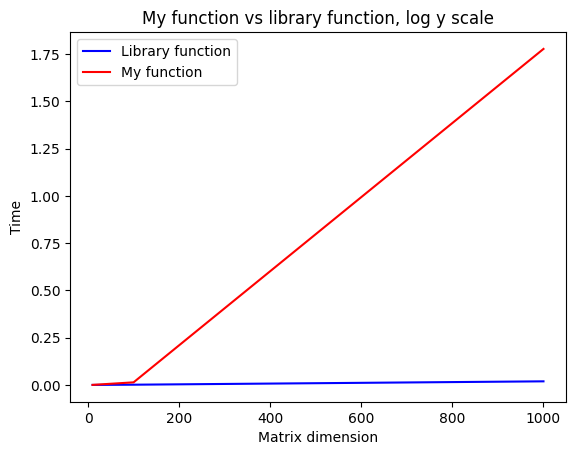

In [18]:
# Запустите этот блок кода
lib_times = []
my_times = []
dimensions = [10, 100, 1000]
for dim in dimensions:
    A = np.random.rand(dim, dim)
    res_lib = %timeit -o sla.det(A)
    lib_times.append(res_lib.best)
    res_my = %timeit -o my_det(A)
    my_times.append(res_my.best)

plt.plot(dimensions, lib_times, color='blue', label='Library function')
plt.plot(dimensions, my_times, color='red', label='My function')
plt.title('My function vs library function, log y scale')
plt.ylabel('Time')
plt.xlabel('Matrix dimension')
plt.legend()

У вас должны были получиться графики, показывающие, как растёт с ростом размерности матрицы время вычисления определителя. Поскольку они вышли не больно-то красивыми, мы нарисуем их в *логарифмическом масштабе* по оси у:

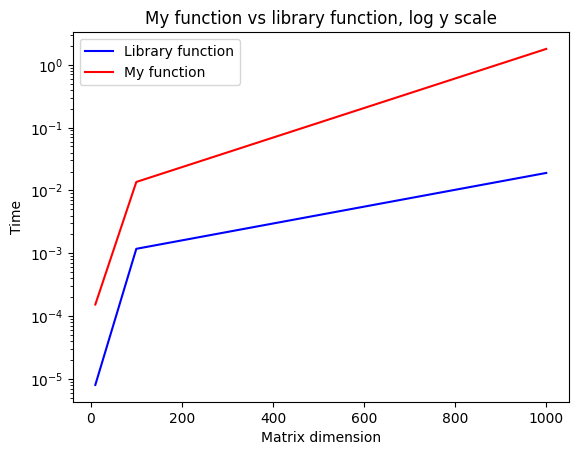

In [22]:
# Запустите этот блок кода
plt.semilogy(dimensions, lib_times, color='blue', label='Library function')
plt.semilogy(dimensions, my_times, color='red', label='My function')
plt.title('My function vs library function, log y scale')
plt.ylabel('Time')
plt.xlabel('Matrix dimension')
plt.legend()

Вы можете убедиться, что библиотечная функция работает *гораздо* быстрее.

## Часть 3. Точность

Наверняка вы уже что-то знаете про floating point arithmetics и связанные с этим трудности и понимаете, что на компьютере вычисления с вещественными числами производятся лишь с ограниченной точностью.

**Задание 3.1 [0.6 балла]** В качестве первого примера, показывающего различие между длинной арифметикой целых чисел и floating point arithmetics, предлагаем вам перемножить две пары матриц:

$$
\begin{pmatrix}
1 & 0\\
10^{20} & 1
\end{pmatrix}
\cdot
\begin{pmatrix}
10^{-20} & 1\\
0 & 1 - 10^{20}
\end{pmatrix}
$$
и
$$
\begin{pmatrix}
1. & 0.\\
10.^{20} & 1.
\end{pmatrix}
\cdot
\begin{pmatrix}
10.^{-20} & 1.\\
0. & 1. - 10.^{20}
\end{pmatrix}
$$
Во втором случае мы специально указали Питону (поставив везде десятичные точки), что хотим работать не с целыми числами, а с числами с плавающей точкой. Посмотрим, получатся ли одинаковые ответы:

In [25]:
print(np.array([[1, 0], [10**20, 1]]) @ np.array([[10**-20, 1], [0, 1-10**20]]))
print(np.array([[1., 0.], [10.**20, 1.]]) @ np.array([[10.**-20, 1.], [0, 1.-10.**20]]))

[[1e-20 1]
 [1.0 1]]
[[1.e-20 1.e+00]
 [1.e+00 0.e+00]]


И какой из них правильный?

---

$$
\begin{pmatrix}
1 & 0\\
10^{20} & 1
\end{pmatrix}
\cdot
\begin{pmatrix}
10^{-20} & 1\\
0 & 1 - 10^{20}
\end{pmatrix}
= \begin{pmatrix}
1 \cdot 10^{-20} + 0 & 1+0\\
1 & 1
\end{pmatrix} =\begin{pmatrix}
10^{-20}  & 1\\
1 & 1
\end{pmatrix}$$

**Ответ:** первый


**Задание 3.2 [0.75 балла]** Впрочем, и с целыми числами тоже не всегда всё хорошо. Напишите функцию, генерирующую *матрицу Паскаля* заданной размерности $n$, то есть матрицу $P$, в которой $P_{ij} = C_{i+j}^i$. В этом задании нельзя пользоваться библиотечной функцией `scipy.linalg.pascal` или её аналогами из других библиотек. Обратите внимание, что использование факториалов крайне нежелательно, так как быстро приведёт к переполнению.

В этом задании вы можете использовать цикл ``for``.

In [5]:
def my_pascal(dim):
    '''
    Мы создали для вас матрицу из нулей размера dim x dim,
    но вы можете ей не пользоваться, если не хотите
    '''
    if dim == 1:
        return [[1]]

    P = np.zeros((dim, dim))
    for i in range(dim):
        P[i][0] = 1
    P[1][1] = 1

    for i in range(2, dim):
        for j in range(1, dim):
            P[i][j] = P[i-1][j-1]+P[i-1][j]

    return P


Чему равен её определитель? **Строго** поясните свой ответ.

----
Матрица паскаля - нижнетреугольная матрица, а определитель нижнетреугольной матрицы всегда равен произведению элементов на диагонали. На диагонали в матрице паскаля будет стоять элемент $\binom{i}{i}$ $\forall i \in \mathbb{N}$, что по формуле равно $\frac{i!}{i!0!} = 1$. Значит на диагонали будут стоять только единицы, следовательно, определитель будет равен 1.

**Ответ:** 1

А теперь вычислите определитель матрицы Паскаля $30\times30$ с помощью библиотечной функции `scipy.linalg.det`:

In [6]:
sla.det(my_pascal(30))

1.0

Разница заметна невооружённым взглядом!

## Часть 4. Матричные вычисления

Вы уже видели, что использования циклов (и самописных вычислений в целом) в Питоне лучше по возможности избегать, и важно уметь находить способы делать всё библиотечными средствами.

В качестве примера рассмотрим две задачи:

**1.** Предположим, нужно вычислить суммы элементов в каждой строке матрицы `A`. Ясно, что можно написать простую функцию с двумя циклами, которая это посчитает, но так лучше не делать. Правильный способ такой:
```
A.sum(axis=1)
```
Параметр `axis=1` означает, что суммы берутся по строкам. Если вы хотите просуммировать по столбцам, укажите `axis=0`. Если вообще пропустить параметр `axis` (вызвать `A.sum()`), то функция вернёт сумму *всех* элементов матрицы.

**2.** Теперь допустим, что нам нужно каждый столбец матрицы `A` умножить на некоторое число. Более точно, пусть у нас есть (одномерный) вектор `w = np.array([w_1,...,w_n])`, и мы должны `i`-й столбец `A` умножить на число `w_i`. Опять же, это можно сделать в пару циклов, но лучше использовать операцию поэлементного умножения:
```
A * w.reshape((1,n))
```
Оператор `reshape` нужен для того, чтобы из одномерного вектора сделать вектор-строку.

Аналогично, если на числа `w_1,...,w_n` умножаются *строки* матрицы, нужно превратить `w` в вектор-столбец:
```
A * w.reshape((n,1))
```

Дальше вам будет предложено попрактиковаться в матричных вычислениях. В следующих трёх заданиях нельзя пользоваться циклами, а также конструкциями `map` и `reduce` и им подобными; вместо этого постарайтесь свести всё к матричным операциям из `numpy` (но, опять же, не `np.vectorize` или чему-то подобному). Чтобы убедиться, что получилось именно то, что нужно, пишите собственные тесты со случайными матрицами.

**Задание 4.1 [0.75 балла]** Напишите функцию `prod_and_sq_sum(A)`, вычисляющую произведение диагональных элементов, а также сумму квадратов диагональных элементов квадратной матрицы `A`.

In [7]:
def prod_and_sq_sum(A):
    A = np.array(A)
    return (np.prod(A.diagonal()), np.linalg.norm(A.diagonal()))

print(prod_and_sq_sum([[1, 2, 3], [4, 5, 6], [7, 8, 9]]))
 

(45, 10.344080432788601)


**Задание 4.2 [0.75 балла]** Для матриц `A` и `B` размера $m\times n$ обозначим через $a_1,\ldots,a_n$ и $b_1,\ldots,b_n$ соответственно их столбцы; пусть также $\lambda_1, \ldots, \lambda_n$ – некоторые числа. Напишите функцию `f(A, B, lmbd, k)`, вычисляющую

$$\sum_{i=1}^{\min(k,n)}\lambda_ia_ib_i^T$$

In [ ]:
A = [[1, 2, 1, 0],
     [1, 0, 2, 1],
     [3, 1, 1, 1]]

B = [[1, 1, 1, 0],
     [2, 1, 3, 0],
     [1, 0, 0, 1]]

lmbd = [1, 2, 3, 4]

def f(A, B, lmbd, k):
    A, B, lmbd = np.array(A), np.array(B), np.array(lmbd)
    return np.sum((lmbd*A*np.flip(B, 0))[:,:min(k, A.shape[1])], axis=1, keepdims=True)


print(f(A, B, lmbd, 3))

[[ 1]
 [20]
 [ 8]]


**Задание 4.3 [0.75 балла]** Напишите функцию `get_diag(A,B)`, принимающую две квадратных матрицы матрицы `A` и `B` одного размера и возвращающую вектор диагональных элементов произведения `AB`, не вычисляя произведение целиком.

In [1]:

def get_diag(A, B):
    return np.einsum("ij,ji->i", A, B)

## Часть 5. Комплексные числа и геометрия

У вас уже была возможность убедиться, что многие операции над комплексными числами имеют наглядную геометрическую интерпретацию. В этом задании вам будет предложено этим воспользоваться.

В Python число $i$ (мнимая единица) обозначено через `1j`. Так, число $0,5 + 1,2i$ будет иметь вид `0.5 + 1.2 * 1j`.

При выполнении задания вы должны работать с точками плоскости как с комплексными числами. Любые преобразования должны быть реализованы с помощью операций над комплексными числами: сложения, вычитания, умножения, деления, возведения в степень и комплексного сопряжения.

**Задание 5.1 [0.5 баллов]** Напишите функцию `shrink_rotate`, которая принимает на вход:
- заданную в виде комплексного числа точку $X$, которую мы подвергаем преобразованию,
- заданную в виде комплексного числа точку $A$,
- действительный коэффициент `coef`,
- угол `alpha`, заданный в радианах

и осуществляет следующее преобразование: мы берём вектор $AX$, умножаем его на `coef`, поворачиваем вокруг точки $A$ на угол `alpha` против часовой стрелки, после чего возвращаем конец полученного вектора. Ниже (левая картинка) мы приводим иллюстрацию действия этого преобразования:

<img src="ShrinkRotate.png">

**Задание 5.2 [0.5 баллов]** Напишите функцию `shrink_rotate_conj`, которая сначала делает то же самое, что и `shrink_rotate`, а после этого отражает вектор $AY$ относительно горизонтальной прямой, проходящей через точку $A$, и возвращает точку $Y'$ (см. правую часть рисунка).

**Задание 5.3 [0.5 баллов]** Напишите функцию `geometric_inverse`, которая принимает на вход:
- заданную в виде комплексного числа точку $X$, которую мы подвергаем преобразованию,
- заданную в виде комплексного числа точку $A$,
- положительное действительное число $r$

и осуществляет инверсию точки $X$ относительно окружности с центром $A$ радиуса $r$. [Определение инверсии вы можете посмотреть здесь](https://ru.wikipedia.org/wiki/%D0%98%D0%BD%D0%B2%D0%B5%D1%80%D1%81%D0%B8%D1%8F_(%D0%B3%D0%B5%D0%BE%D0%BC%D0%B5%D1%82%D1%80%D0%B8%D1%8F)).

In [ ]:

def shrink_rotate(x, a, coef=1., angle=0.):
    vec = np.array([x.real - a.real, x.imag - a.imag])*coef
    origin = np.array([a.real, a.imag])

    R = np.array([[np.cos(angle), -np.sin(angle)],
                  [np.sin(angle), np.cos(angle)]])

    vec = (R @ vec).flatten()
    res = origin+vec

    return complex(res[0], res[1])



def shrink_rotate_conj(x, a, coef=1., angle=0.):
    origin = np.array([a.real, a.imag])
    y = shrink_rotate(x, a, coef=coef, angle=angle)

    new_vec = np.array([y.real, y.imag])-origin
    new_vec[1] = -new_vec[1]

    res = origin+new_vec
    return complex(res[0], res[1])



def geometric_inverse(x, a, r):
    vec = np.array([x.real - a.real, x.imag - a.imag])
    dist = np.linalg.norm(vec)
    return shrink_rotate(x, a, coef=r**2/dist**2)





**Задание 5.4 [0.75 баллов]** Рассмотрим следующий процесс:

```
z = 0.5 + 0.*1j
max_iter = 100000
funcs = [
    (lambda t: shrink_rotate(t, 0. + 1.*1j, coef=0.5, angle=0.)),
    (lambda t: shrink_rotate(t, 1. + 0.*1j, coef=0.5, angle=0.)),
    (lambda t: shrink_rotate(t, -1. + 0.*1j, coef=0.5, angle=0.))
]

for n_iter in range(max_iter):
    n_func = np.random.choice(len(funcs))
    z = funcs[n_func](z)
```

Запустите его и нарисуйте множество точек, получающихся на итерациях начиняя с десятой.

*Указание*. Представьте квадрат $[-1,1]\times[-1,1]$ матрицей пикселей 1000x1000. Сначала все элементы матрицы положим нулями, а на каждой итерации начиная с десятой будем присваивать единицу соответствующему пикселю этой матрицы. То, что получилось, можно нарисовать с помощью функции `plt.imshow(..., cmap='gray')`. Картинку лучше сделать побольше, предварив `imshow` вызовом `plt.figure(figsize=(20, 20))`.

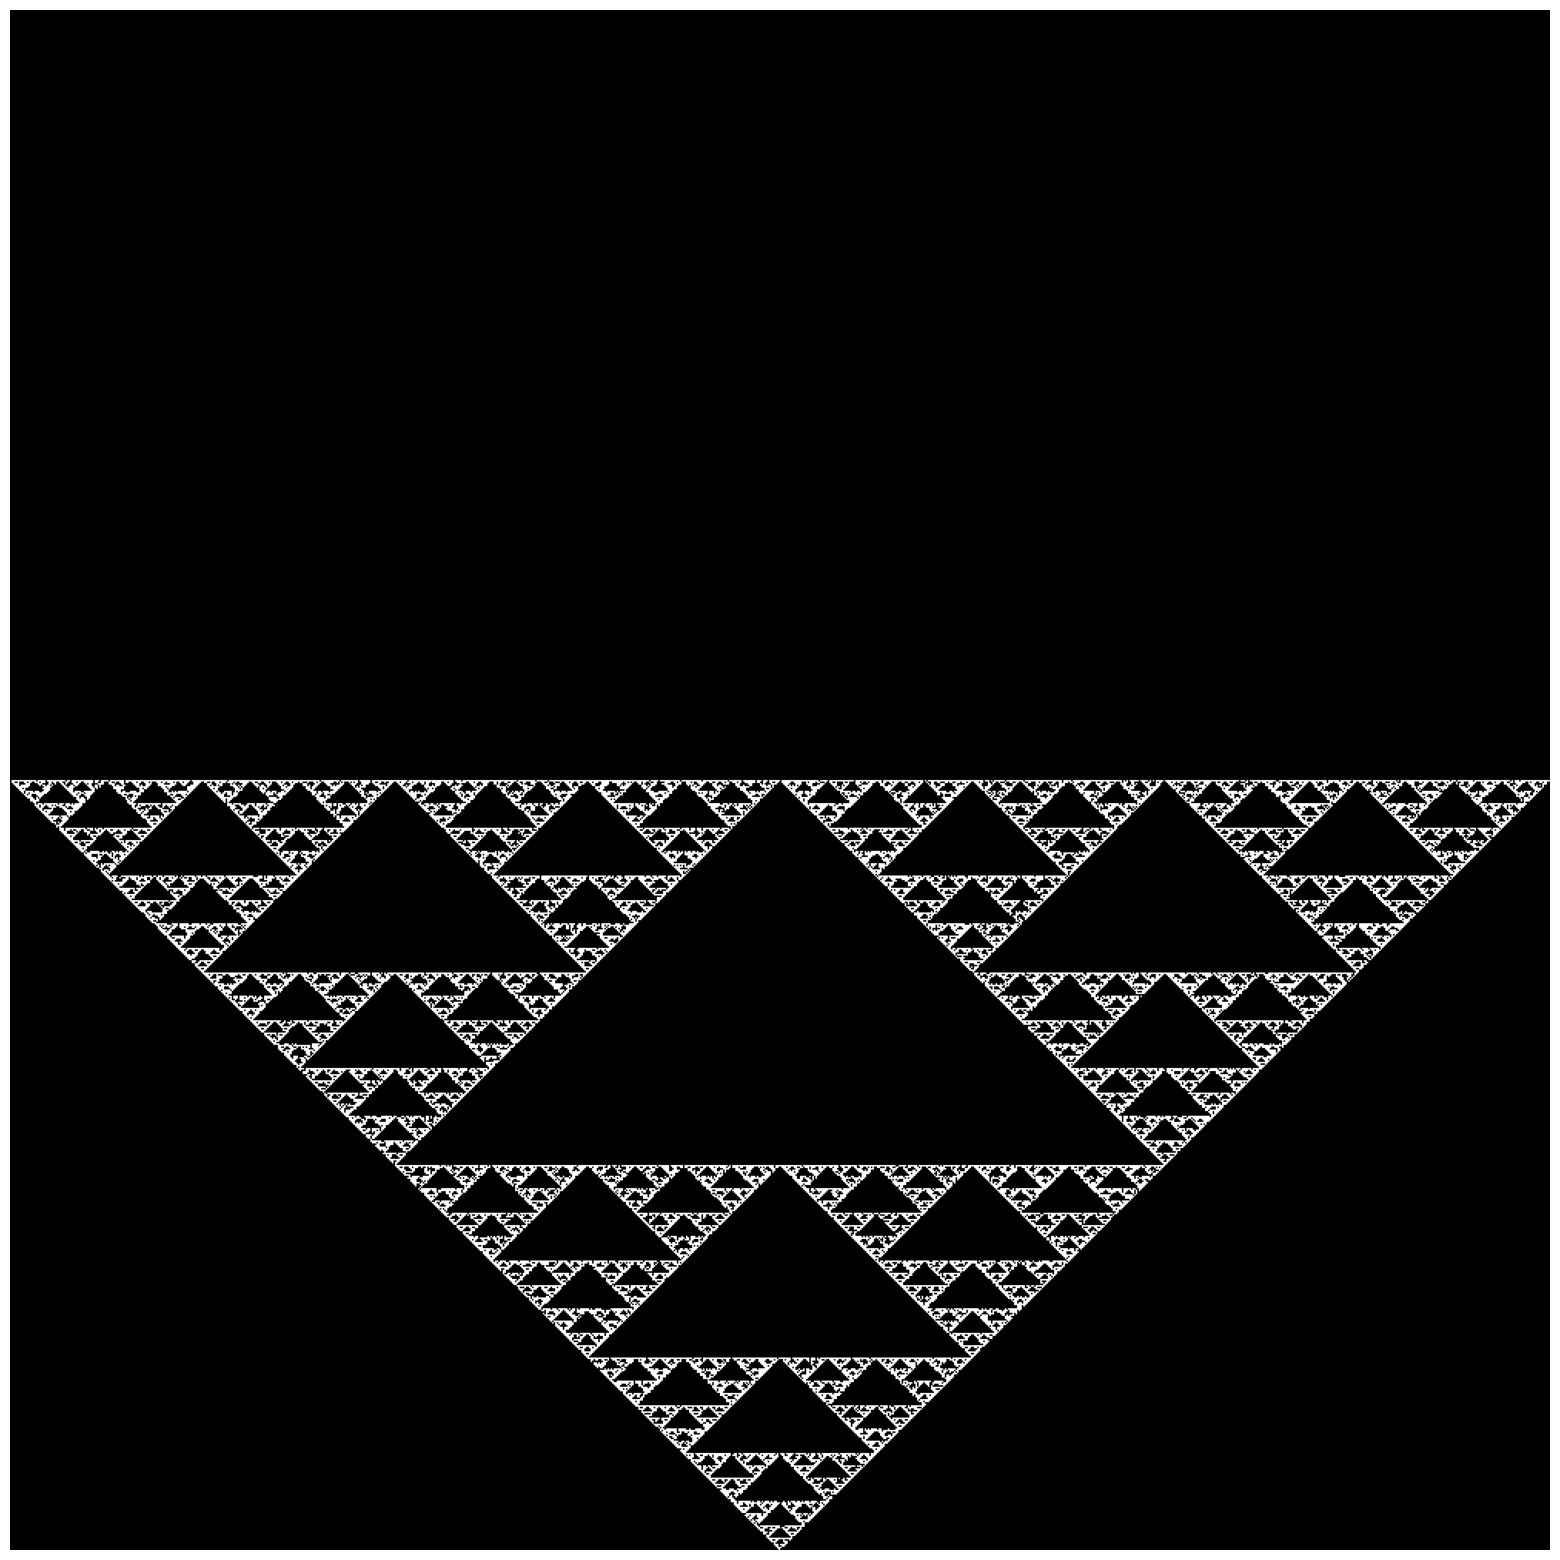

In [173]:
z = 0.5 + 0.*1j
max_iter = 100000
funcs = [
    (lambda t: shrink_rotate(t, 0. + 1.*1j, coef=0.5, angle=0.)),
    (lambda t: shrink_rotate(t, 1. + 0.*1j, coef=0.5, angle=0.)),
    (lambda t: shrink_rotate(t, -1. + 0.*1j, coef=0.5, angle=0.))
]

a = np.zeros((1000, 1000))

for n_iter in range(max_iter):
    n_func = np.random.choice(len(funcs))
    z = funcs[n_func](z)


    if n_iter >= 9:
        x = int((z.real + 1) * 500)
        y = int((z.imag + 1) * 500)

        if 0 <= x < 1000 and 0 <= y < 1000:  
            a[y, x] = 1

plt.figure(figsize=(20, 20))
plt.imshow(a, cmap='gray')
plt.axis('off')
plt.show()
        

**Задание 5.5 [0.75 баллов]** Попробуйте объяснить, почему получается именно эта фигура.

---
Каждая функция `shrink_rotate` с коэффициентом `coef=0.5` сжимает исходную точку в 2 раза и перемещает её к одной из трёх фиксированных точек: 
`0+1i`, `1+0i`, `−1+0i`. Эти точки расположены в вершинах равностороннего треугольника. На каждом шаге происходит случайный выбор одной из трёх функций, что приводит к тому, что точки случайным образом распределяются по меньшим треугольникам. Каждый новый треугольник создаётся с уменьшенным масштабом, оставаясь в одной из трёх возможных позиций.

**Задание 5.6 [0.5 баллов]** Поэкспериментируйте с другими преобразованиями. Попробуйте найти какой-нибудь другой красиво выглядящий фрактал.

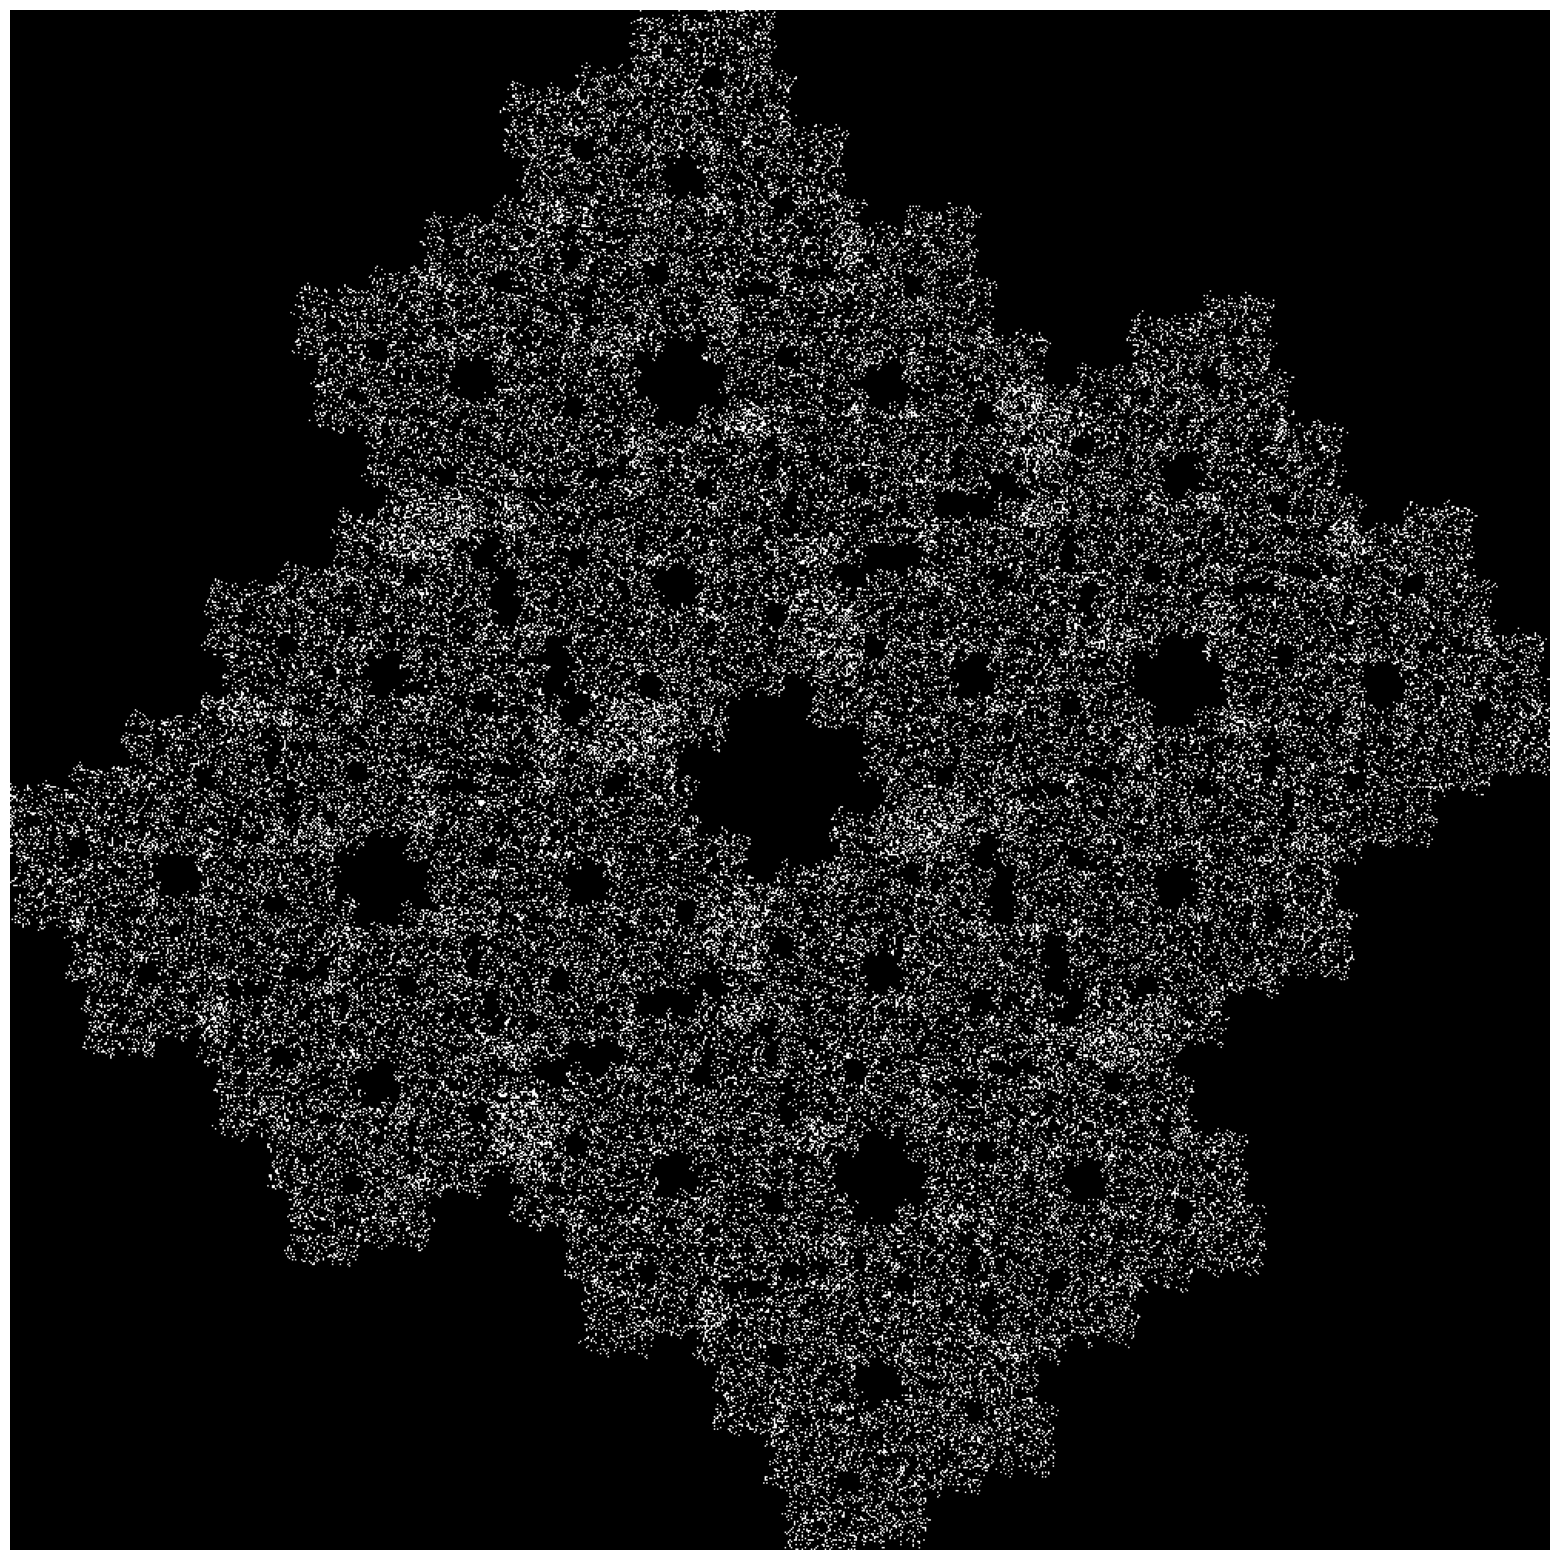

In [188]:
z = 0.5 + 0.*1j
max_iter = 100000
funcs = [
    (lambda t: shrink_rotate(t, 0. + 1.*1j, coef=0.5, angle=np.pi/12)),
    (lambda t: shrink_rotate(t, 1. + 0.*1j, coef=0.5, angle=np.pi/12)),
    (lambda t: shrink_rotate(t, -1. + 0.*1j, coef=0.5, angle=np.pi/12)),
    (lambda t: shrink_rotate(t, 0. + -1.*1j, coef=0.5, angle=np.pi/12))
]

a = np.zeros((1000, 1000))

for n_iter in range(max_iter):
    n_func = np.random.choice(len(funcs))
    z = funcs[n_func](z)


    if n_iter >= 9:
        x = int((z.real + 1) * 500)
        y = int((z.imag + 1) * 500)

        if 0 <= x < 1000 and 0 <= y < 1000:  
            a[y, x] = 1

plt.figure(figsize=(20, 20))
plt.imshow(a, cmap='gray')
plt.axis('off')
plt.show()

## Часть 6 (бонус). Метод Гаусса или обратные матрицы?

**Задание 6.1 [1.5 балла]** Пусть нам дано матричное уравнение $Ax = B$, где $A$ – матрица размера $n\times n$, а $B$ – матрица размера $n\times m$ (отметим, что это уравнение можно интерпретировать как $m$ систем с векторными правыми частями и однаковыми левыми). Вообще говоря, методов решения таких уравнений очень много, но мы пока рассмотрим два из них, с которыми вы уже хорошо знакомы.
1. Метод Гаусса;
2. Умножение на обратную матрицу: $x = A^{-1}B$.

В этом задании вы попробуете ответить на вопрос о том, какой из этих методов эффективнее. Проведите два эксперимента:
- сравните скорости решения системы при фиксированном `m = 10` и `n`, изменяющемся в пределах от 10 до 1000, например, для `n=10, 50, 100, 200, 500, 1000` (рост числа неизвестных при фиксированном количестве правых частей);
- сравните скорости решения системы при фиксированном `n = 100` и `m`, меняющемся от 10 до 10000, например, для `m = 10, 100, 500, 1000, 2000, 5000, 10000` (рост числа правых частей при фиксированном числе неизвестных).

При проведении экспериментов не возбраняется использовать циклы `for`.

Эксперименты проведите на случайных матрицах, созданных с помощью функции `numpy.random.rand`. Постройте графики времени выполнения функции от размерности (лучше в логарифмическом масштабе). Сделайте выводы (в письменном виде!) о том, какой из методов оказывается лучше в каких обстоятельствах.

Чтобы всё это не казалось вам чёрной магией, найдите число операций (суммарно сложения, умножения и деления), необходимых для решения системы каждым из методов. Обратите внимания на члены суммарной степени 3 (суммарной по $m$ и $n$; члены меньшего порядка можете даже не считать). Постарайтесь объяснить полученные ранее результаты.

[10, 100, 500, 1000, 2000, 5000, 10000] [0.0010001659393310547, 0.0010001659393310547, 0.0010006427764892578, 0.0019998550415039062, 0.003000497817993164, 0.006001472473144531, 0.027005672454833984]


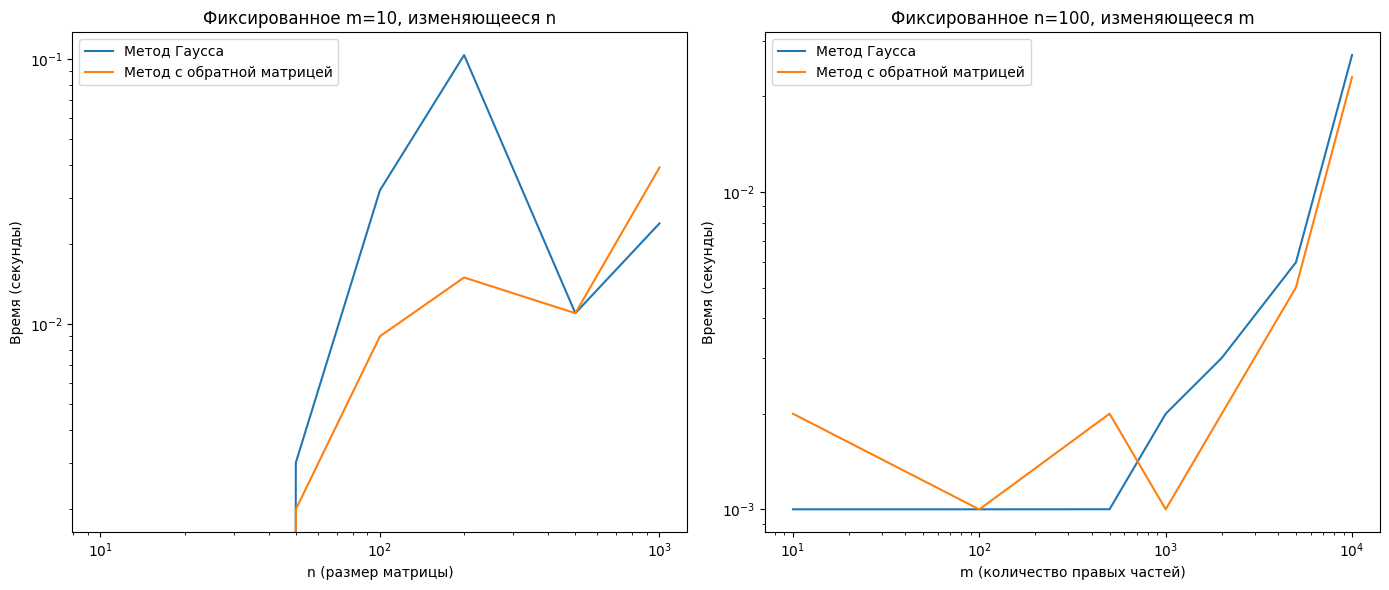

In [ ]:
import time

n_values_fixed_m = [10, 50, 100, 200, 500, 1000]
m_fixed_n = 10

m_values_fixed_n = [10, 100, 500, 1000, 2000, 5000, 10000]
n_fixed_m = 100


def gauss_method(A, B):
    return np.linalg.solve(A, B)


def inverse_method(A, B):
    A_inv = np.linalg.inv(A)
    return A_inv.dot(B)


def measure_time(method, A, B):
    start_time = time.time()
    method(A, B)
    return time.time() - start_time


# 1
times_gauss_fixed_m = []
times_inv_fixed_m = []

for n in n_values_fixed_m:
    A = np.random.rand(n, n)
    B = np.random.rand(n, m_fixed_n)

    time_gauss = measure_time(gauss_method, A, B)
    time_inv = measure_time(inverse_method, A, B)

    times_gauss_fixed_m.append(time_gauss)
    times_inv_fixed_m.append(time_inv)

# 2
times_gauss_fixed_n = []
times_inv_fixed_n = []

for m in m_values_fixed_n:
    A = np.random.rand(n_fixed_m, n_fixed_m)
    B = np.random.rand(n_fixed_m, m)

    time_gauss = measure_time(gauss_method, A, B)
    time_inv = measure_time(inverse_method, A, B)

    times_gauss_fixed_n.append(time_gauss)
    times_inv_fixed_n.append(time_inv)


plt.figure(figsize=(14, 6))

# 1
plt.subplot(1, 2, 1)
plt.plot(n_values_fixed_m, times_gauss_fixed_m, label="Метод Гаусса")
plt.plot(n_values_fixed_m, times_inv_fixed_m,
         label="Метод с обратной матрицей")
plt.xlabel("n (размер матрицы)")
plt.ylabel("Время (секунды)")
plt.title("Фиксированное m=10, изменяющееся n")
plt.legend()
plt.yscale("log")
plt.xscale("log")

# 2
plt.subplot(1, 2, 2)
plt.plot(m_values_fixed_n, times_gauss_fixed_n, label="Метод Гаусса")
plt.plot(m_values_fixed_n, times_inv_fixed_n,
         label="Метод с обратной матрицей")
plt.xlabel("m (количество правых частей)")
plt.ylabel("Время (секунды)")
plt.title("Фиксированное n=100, изменяющееся m")
plt.legend()
plt.yscale("log")
plt.xscale("log")

plt.tight_layout()
plt.show()